# This notebook is just to understand the differences between t-SNE and PCA 

T-SNE is a non-linear dimensionality reduction technique and it is good in preserving the local structure of the data but it fails to preserve distances between different neighborhoods (the distance between the clusters) .
With T-SNE representation, the cluster size does not mean much (a sparse and dense cluster in the original dimension might end up with similar-sized cluster representations in the lower dimension ) which means T-SNE doesn't care about the variance of the data, while the PCA, which is a linear dimensionality reduction technique, finds a linear projection of high  data in such a way that the variance of the projected data is maximized. 

This means, PCA is  trying to preserve the large Euclidean distances found in high dimensional space onto the lower dimensional space , keeping data far apart. The major drawback of PCA is that PCA fails to preserve smaller distance and local structure of the data

 PCA tries to preserve the global structure of data points and its main objective does not lie with preserving the relative distance between points(PCA doesn't preserve local structure) but with the overall variance along axes.

One disadvantage of PCA is it doesn't consider the distance between the point. This is the main advantage of t-SNE over PCA. t-SNE measures similarities between points in a high dimensional space and looks for local similarities, meaning similarities to nearby points which are much more useful.



In [53]:

# MNIST dataset downloaded from Kaggle : 
#https://www.kaggle.com/c/digit-recognizer/data

# Functions to read and show images.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


   
d0 = pd.read_csv('data/train.csv')

print(d0.head(5)) # print first five rows of d0.

# save the labels into a variable l.
l = d0['label']

# Drop the label feature and store the pixel data in d.
d = d0.drop("label",axis=1)

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [54]:

print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


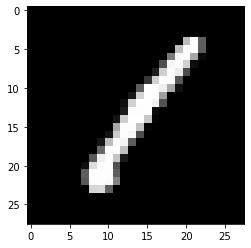

0


In [55]:
#loc gets rows (and/or columns) with particular labels.
#iloc gets rows (and/or columns) at integer locations.

 
grid_data = d.iloc[0].to_numpy().reshape(28,28)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data,cmap = "gray")
plt.show()

print(l[idx])

# PCA 2D visualising using Scikit-Learn


In [62]:
labels = l.head(20000)
data = d.head(20000)

print("the shape of sample data = ", data.shape)

the shape of sample data =  (20000, 784)


In [49]:
# Data-preprocessing: Standardizing the data

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(15000, 784)


In [50]:
sample_data = standardized_data

In [46]:

# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()

In [24]:
# configuring the parameteres
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)

shape of pca_reduced.shape =  (15000, 2)


/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


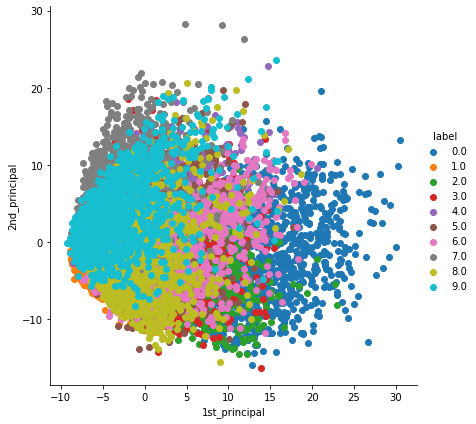

In [25]:
# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, labels)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

- Disadvantage of PCA is it doesnt consider the distance between the point but it considers if the points lie in one direction which doesnt give good result.


# PCA for dimensionality redcution (not for visualization)¶


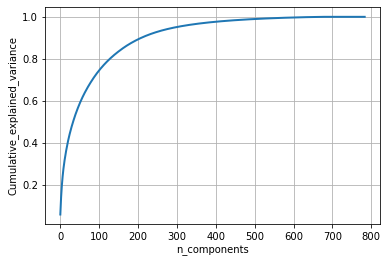

In [28]:
# PCA for dimensionality redcution (non-visualization)

pca.n_components = 784
pca_data = pca.fit_transform(sample_data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()


# If we take 200-dimensions, approx. 90% of variance is expalined.

# T-SNE using Scikit-Learn


In [59]:
from sklearn.preprocessing import StandardScaler

labels = l.head(20000)
data = d.head(20000)
# Data-preprocessing: Standardizing the data

print("the shape of sample data = ", data.shape)
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)


the shape of sample data =  (20000, 784)
(20000, 784)


/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


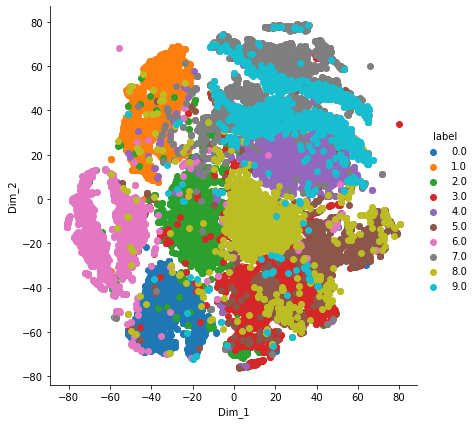

In [60]:
# TSNE



from sklearn.manifold import TSNE

# Picking the top 1000 points as TSNE takes a lot of time for 15K points
#data_1000 = standardized_data[0:1000,:]
#labels_1000 = labels[0:1000]

# 1-define your model
model = TSNE(n_components=2, random_state=0)#tsne is randomise (stochastic) algorithm if you dont define random_state=0 then you will get slightly diff result each time you run
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(standardized_data)


# creating a new data frame which help us in ploting the result data

tsne_data = np.vstack((tsne_data.T, labels)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


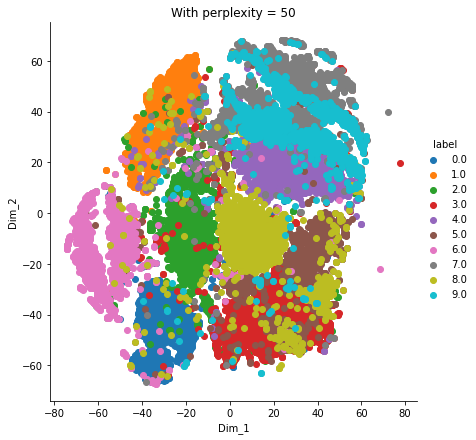

In [61]:

model = TSNE(n_components=2, random_state=0, perplexity=50)
tsne_data = model.fit_transform(standardized_data) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50')
plt.show()

### What t-SNE dose?it group points based on their visual similarity, and points are less similar grouped far away

### From the figures  above 
- we can not interpret  cluster sizes(Dense  or sparse )(varienc) 
- we cannot intreprt distunce between each cluster (T-SNE cannot do that )
- but we can see that T-SNE group each numbers together  in a good way. 
- its worth to mention that tsne is not just preserving the distunce (ex:put all the 1's together)but it also preserving the shape of the 1's(1's with simillar shape close to each other )
- TSNE is better than PCA 
- Advantage of tSNE is it preserves Local Strctures, Global structure is nothing but the entire plot.
- Tsne can even preserve the global structure by changing one param in the method

### T-SNE with 42000 data point

In [66]:
labels = l.head(42000)
data = d.head(42000)

print("the shape of sample data = ", data.shape)
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)


the shape of sample data =  (42000, 784)
(42000, 784)


/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


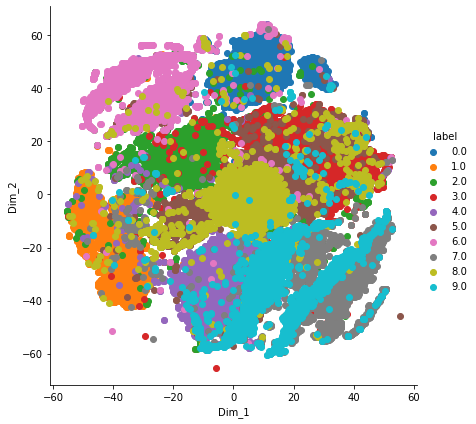

In [67]:
# TSNE
# Data-preprocessing: Standardizing the data



from sklearn.manifold import TSNE

# Picking the top 1000 points as TSNE takes a lot of time for 15K points
#data_1000 = standardized_data[0:1000,:]
#labels_1000 = labels[0:1000]

model = TSNE(n_components=2, random_state=0, perplexity=50)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(standardized_data)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

# 2D Visualization using PCA without Scikit-Learn(Understand  how PCA works)


In [68]:
# Pick first 15K data-points to work on for time-effeciency.
#Excercise: Perform the same analysis on all of 42K data-points.

labels = l.head(15000)
data = d.head(15000)

print("the shape of sample data = ", data.shape)

the shape of sample data =  (15000, 784)


In [32]:
# Data-preprocessing: Standardizing the data

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(15000, 784)


In [33]:
#find the co-variance matrix which is : A^T * A
sample_data = standardized_data

# matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T , sample_data)

print ( "The shape of variance matrix = ", covar_matrix.shape)

The shape of variance matrix =  (784, 784)


In [34]:
# finding the top two eigen-values and corresponding eigen-vectors 
# for projecting onto a 2-Dim space.

from scipy.linalg import eigh 

# the parameter 'eigvals' is defined (low value to heigh value) 
# eigh function will return the eigen values in asending order
# this code generates only the top 2 (782 and 783) eigenvalues.
values, vectors = eigh(covar_matrix, eigvals=(782,783))

print("Shape of eigen vectors = ",vectors.shape)
# converting the eigen vectors into (2,d) shape for easyness of further computations
vectors = vectors.T

print("Updated shape of eigen vectors = ",vectors.shape)
# here the vectors[1] represent the eigen vector corresponding 1st principal eigen vector
# here the vectors[0] represent the eigen vector corresponding 2nd principal eigen vector

Shape of eigen vectors =  (784, 2)
Updated shape of eigen vectors =  (2, 784)


In [35]:
# projecting the original data sample on the plane 
#formed by two principal eigen vectors by vector-vector multiplication.

import matplotlib.pyplot as plt
new_coordinates = np.matmul(vectors, sample_data.T)

print (" resultanat new data points' shape ", vectors.shape, "X", sample_data.T.shape," = ", new_coordinates.shape)


 resultanat new data points' shape  (2, 784) X (784, 15000)  =  (2, 15000)


In [36]:
import pandas as pd

# appending label to the 2d projected data
new_coordinates = np.vstack((new_coordinates, labels)).T

# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())


   1st_principal  2nd_principal  label
0      -5.558661      -5.043558    1.0
1       6.193635      19.305278    0.0
2      -1.909878      -7.678775    1.0
3       5.525748      -0.464845    4.0
4       6.366527      26.644289    0.0


/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


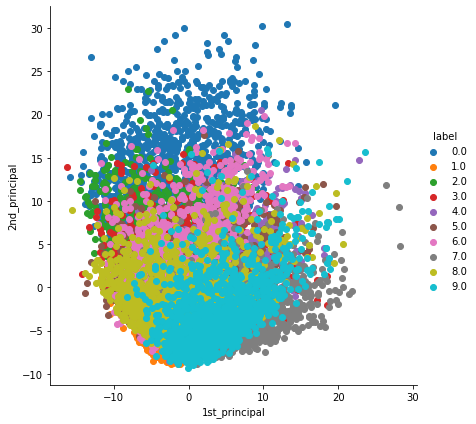

In [37]:
# ploting the 2d data points with seaborn
import seaborn as sn
sn.FacetGrid(dataframe, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()